# CRM Data practice

Set working directory :

In [5]:
setwd(".")

Import CSV file :

In [4]:
crm <- read.csv(file = 'crm.csv')

## Data summary

```
install.packages("funModeling")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("corrplot")
install.packages("psych")
install.packages("CGPfunctions")
install.packages("aplpack")
install.packages("tabplot")
install.packages("summarytools")
install.packages("skimr")
install.packages("purrr")
```

Colnames

In [27]:
colnames(crm)

[1] "Client"         "Origine"        "Sexe"           "Taille"        
[5] "Pointure"       "Poids"          "TempsSite"      "MarquePref"    
[9] "MontantFacture"

In [42]:
crm_nums <- crm[, c(4:7, 9)]
sex_col <- c("blue", "pink")

In [26]:
summary(crm)

     Client     Origine   Sexe       Taille          Pointure    
 Alice  : 1   Mars  :10   F:12   Min.   :  2.00   Min.   :22.00  
 Angel  : 1   Pluton:10   M:18   1st Qu.:  5.25   1st Qu.:27.25  
 Blake  : 1   Terre :10          Median : 22.00   Median :29.00  
 Clyde  : 1                      Mean   : 43.50   Mean   :29.63  
 Deborah: 1                      3rd Qu.: 97.75   3rd Qu.:32.00  
 Derrick: 1                      Max.   :116.00   Max.   :40.00  
 (Other):24                                                      
     Poids          TempsSite        MarquePref MontantFacture 
 Min.   : 24.00   Min.   : 4.00   Marque A:10   Min.   :118.0  
 1st Qu.: 40.25   1st Qu.:18.00   Marque B: 4   1st Qu.:142.0  
 Median : 88.50   Median :29.00   Marque C:12   Median :155.5  
 Mean   :153.87   Mean   :29.33   Marque D: 4   Mean   :175.7  
 3rd Qu.:310.25   3rd Qu.:40.00                 3rd Qu.:216.2  
 Max.   :378.00   Max.   :51.00                 Max.   :258.0  
                        

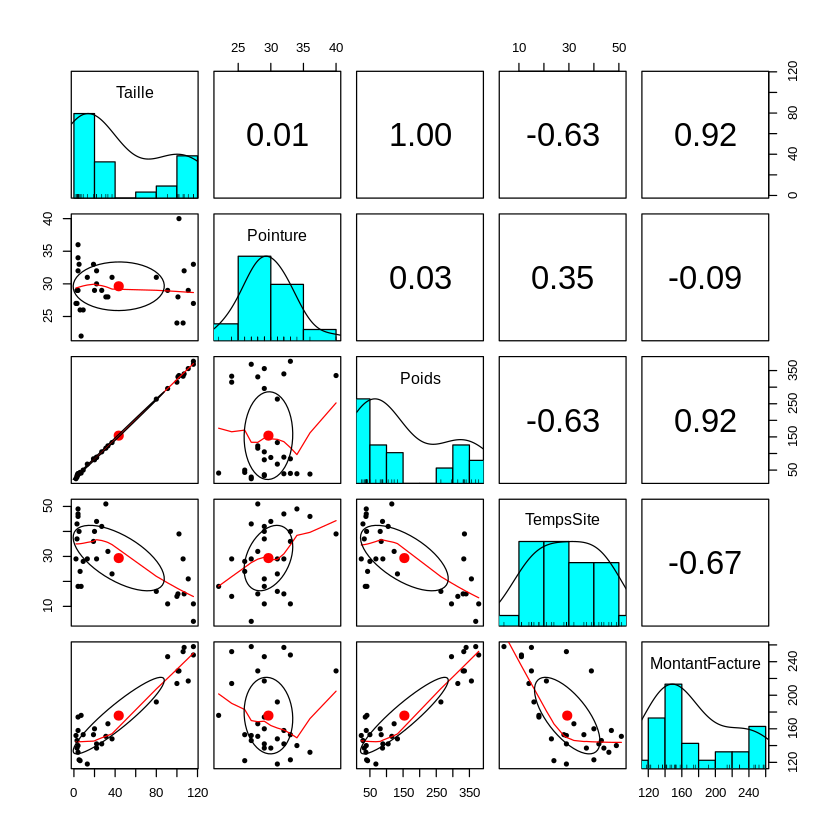

In [37]:
library(psych)


pairs.panels(crm_nums)

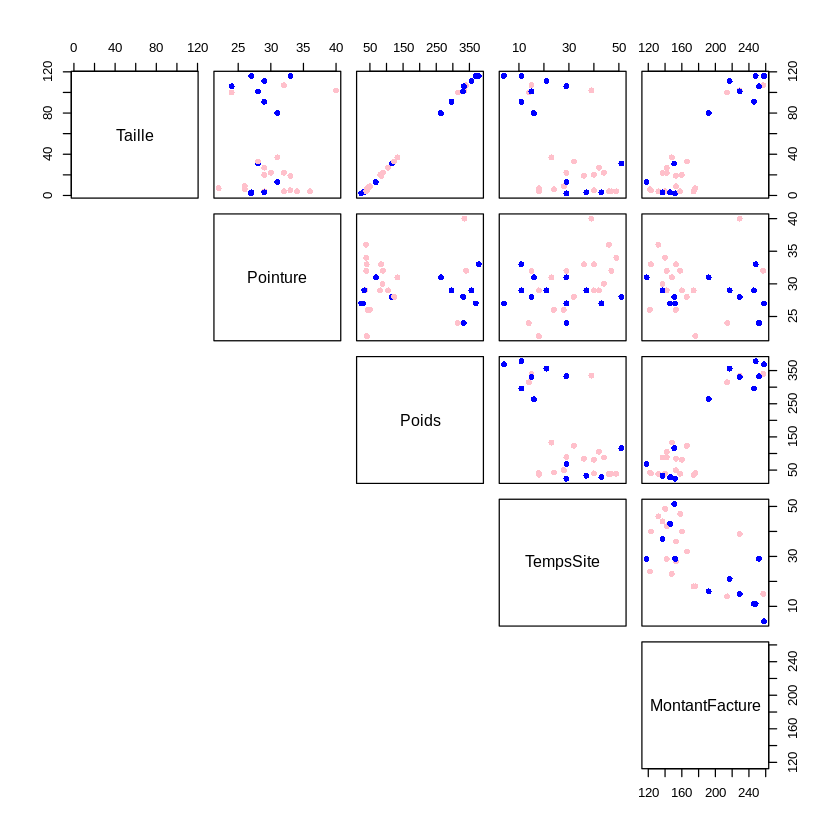

In [43]:
pairs(crm_nums,
     pch = 16,
     col = sex_col[crm$Sexe],
     lower.panel = NULL
     )

Observations :
- le poids et la taille sont fortements corélés positivement
- les grands et gros dépensent plus d'argent
- corélation négative entre le temps passé (dans un magasin?) et le montant total de facture

Analyse categorical vs total amount

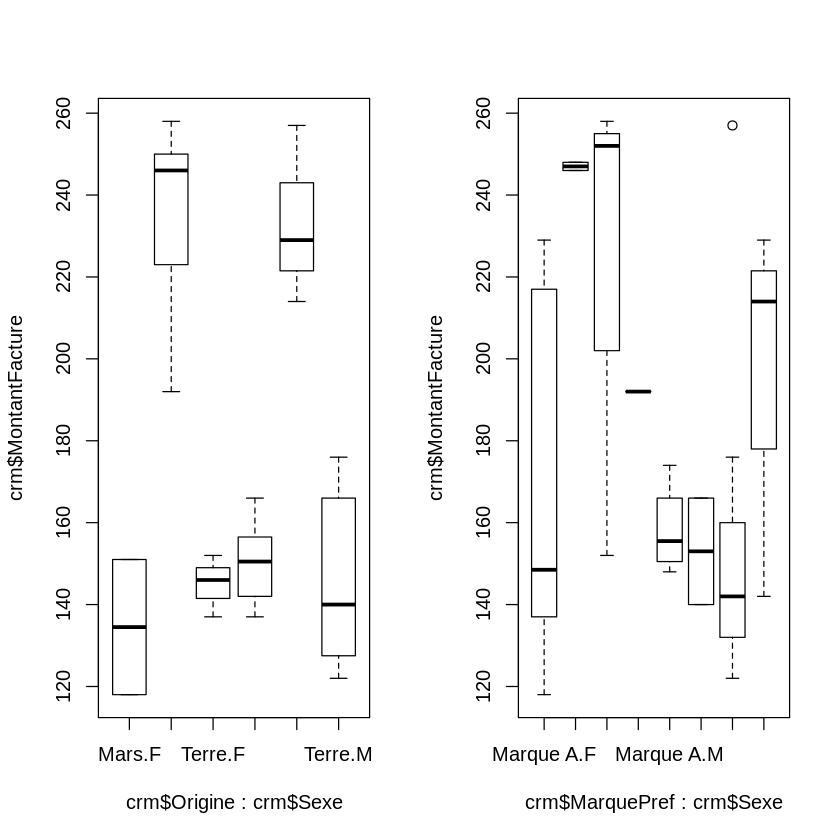

In [59]:
par(mfrow=c(1,2))
boxplot(crm$MontantFacture~crm$Origine*crm$Sexe)
boxplot(crm$MontantFacture~crm$MarquePref*crm$Sexe)


Observations :
- Les plutoniens dépensent le plus tous sexes confondus
- Les femmes dépensent plus dans les marques B et C
- Les hommes dépensent plus dans la marque D

Recommandations :
- cibler les plutoniens pour des pubs

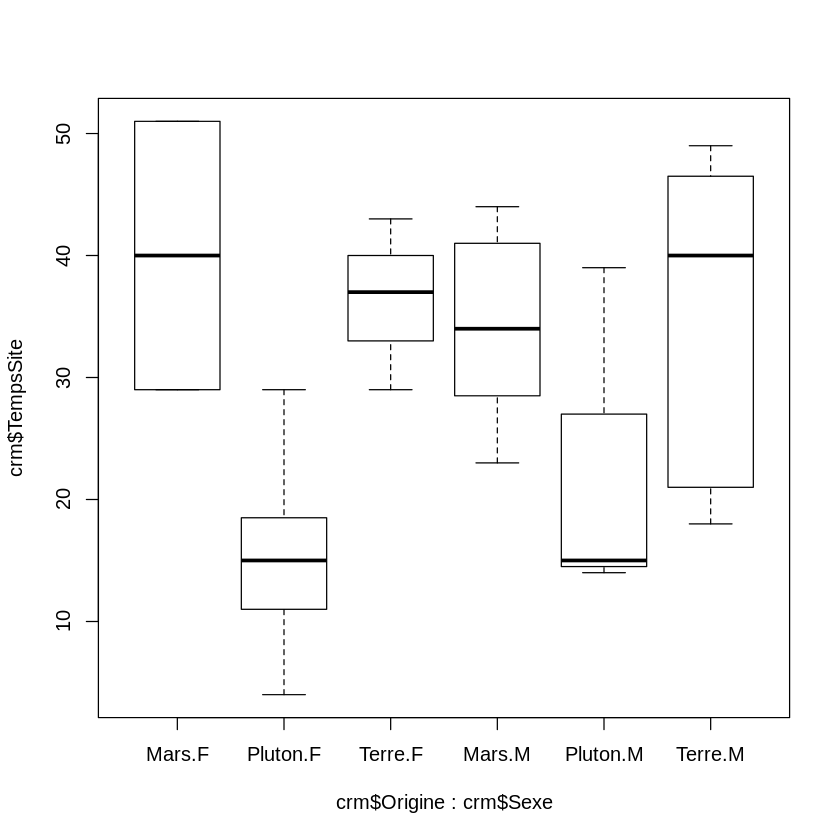

In [64]:
boxplot(crm$TempsSite~crm$Origine*crm$Sexe)

Observations :
- Ce sont les plutionniens qui passent le moins de temps sur site

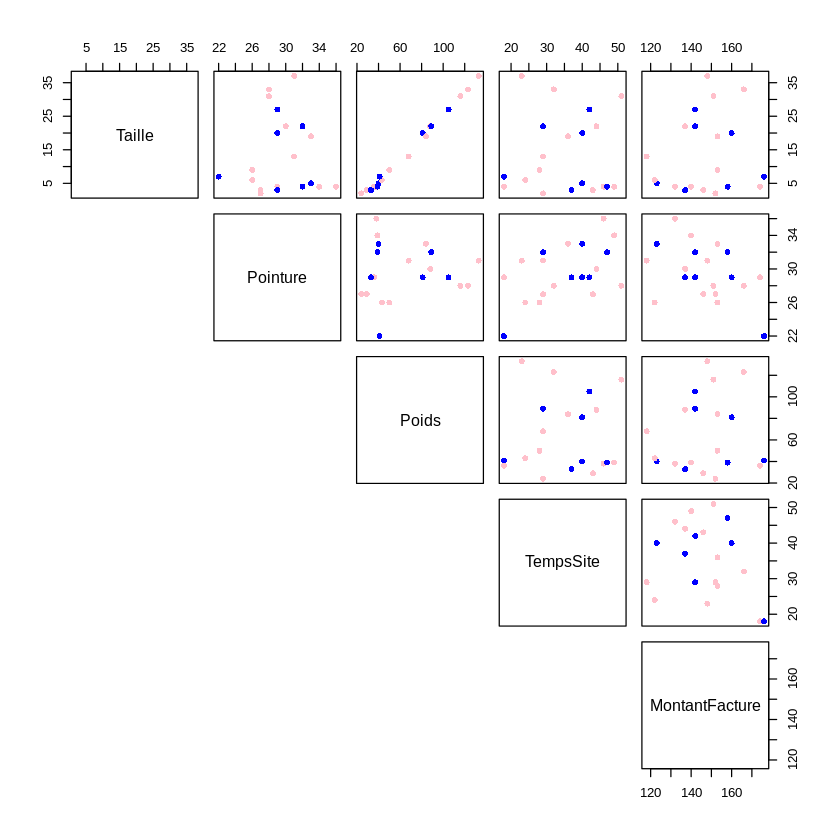

In [67]:
filtered_crm_nums <- filter(crm, Origine != "Pluton")[, c(4:7, 9)]

pairs(filtered_crm_nums,
     pch = 16,
     col = sex_col[crm$Sexe],
     lower.panel = NULL
     )

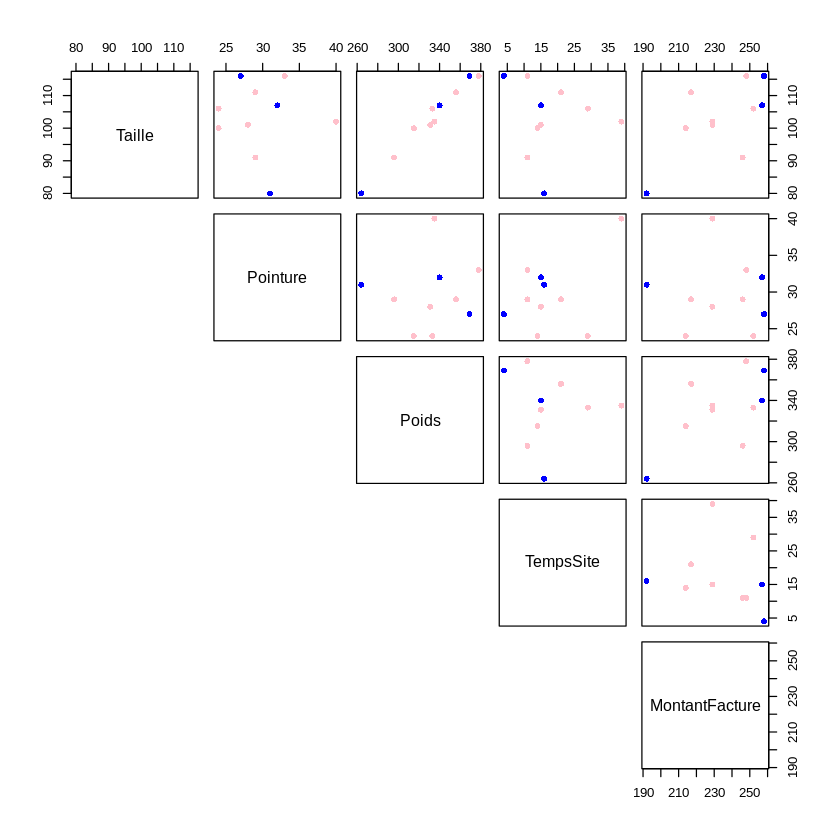

In [68]:
pluto_crm_nums <- filter(crm, Origine == "Pluton")[, c(4:7, 9)]

pairs(pluto_crm_nums,
     pch = 16,
     col = sex_col[crm$Sexe],
     lower.panel = NULL
     )